# Analiza danych w języku Python - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa zespołu, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

In [1]:
NAME = ""
COLLABORATORS = ""

---

## Zestaw zadań 1: Elementy statystyki opisowej 1 (Notatnik 2/4)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import dataframe_image as dfi

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Wczytaj dane z przygotowanego wcześniej pliku dane.csv do tablicy `eruptions_data` w taki sposób, aby kolumna Eruption Number stanowiła indeks tablicy.

Wyświetl przygotowaną tablicę.

In [4]:
eruptions_data = pd.read_csv("eruption_data.csv")
eruptions_data=eruptions_data.set_index('Eruption Number') 

### Zadanie 2: Przegląd danych - wybrane elementy [5 pkt]

#### a) Największe erupcje
Przygotuj i wyświetl tablicę `big_eruptions_data` zawierającą tylko i wyłącznie wiersze tablicy `eruptions_data` dotyczące erupcji, którym została przyporządkowana wartość VEI równa 7.

In [5]:
big_eruptions_data = eruptions_data[eruptions_data['VEI'] == 7]
big_eruptions_data

,Volcano Name,Eruption Category,VEI,Start Year,Start Month,Start Day,End Year,End Month,End Day,Evidence Type,Evidence Method
Eruption Number,,,,,,,,,,,
16231,Tambora,Confirmed,7,1812,NaN,NaN,1815.0,7.0,15.0,Observations,Reported
20843,Rinjani,Confirmed,7,1257,7.0,1.0,NaN,NaN,NaN,Sidereal,Ice Core
13879,Santorini,Confirmed,7,-1610,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)
20904,"Blanco, Cerro",Confirmed,7,-2300,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)
16980,Kikai,Confirmed,7,-4350,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (uncalibrated)
20610,Crater Lake,Confirmed,7,-5680,NaN,NaN,NaN,NaN,NaN,Sidereal,Ice Core
18903,Kurile Lake,Confirmed,7,-6440,NaN,NaN,NaN,NaN,NaN,Isotopic,14C (calibrated)


In [6]:
### Komórka testowa
assert set(big_eruptions_data['Volcano Name'].index) == set([16231, 20843, 13879, 20904, 16980, 20610, 18903])
assert set(big_eruptions_data['Volcano Name'].values) == set(['Tambora', 'Rinjani', 'Santorini', 'Blanco, Cerro', 'Kikai', 'Crater Lake', 'Kurile Lake'])

#### b) Najaktywniejsze wulkany
Przygotuj tablicę `most_active_data` zawierającą następujące elementy:

Indeks:
- domyślny

Kolumny:
- Volcano - nazwy wulkanów
- Recorded eruptions - liczba zarejestrowanych erupcji

Dane w tablicy powinny być posortowane od największej do najmniejszej liczby zarejestrowanych erupcji, a w przypadku takiej samej liczby erupcji alfabetycznie po nazwach wulkanów.

Wyświetl przygotowaną tablicę w taki sposób aby widoczne było 10 pierwszych wierszy, a zawarte w tablicy liczby wyświetlały się bez miejsc po przecinku.

In [7]:
most_active_data = eruptions_data.groupby('Volcano Name').size().sort_values(ascending=False).reset_index(name='Recorded eruptions').sort_values(['Recorded eruptions', 'Volcano Name'], ascending=[False, True])
most_active_data = most_active_data[['Volcano Name', 'Recorded eruptions']]
most_active_data = most_active_data.rename(columns={'Volcano Name': 'Volcano'})
most_active_data.head(10).style.format({'Recorded eruptions': '{:.0f}'}).format(precision=0)

,Volcano,Recorded eruptions
0,"Fournaise, Piton de la",191
1,Asosan,180
2,Villarrica,152
3,Asamayama,128
4,Etna,121
5,Mauna Loa,110
6,Klyuchevskoy,104
7,Sheveluch,102
8,Gamalama,81
9,Merapi,81


In [8]:
### Komórka testowa
assert list(most_active_data.loc[:9, "Volcano"]) == ['Fournaise, Piton de la', 'Asosan', 'Villarrica', 'Asamayama', 'Etna',
                                                         'Mauna Loa', 'Klyuchevskoy','Sheveluch', 'Gamalama', 'Merapi']
assert list(most_active_data.loc[:9, "Recorded eruptions"]) == [191, 180, 152, 128, 121, 110, 104, 102,  81,  81]

#### c) Ostatnie erupcje o określonej wielkości
Przygotuj zmienną `last_eruption_data` zawierającą tablicę zawierającą następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny:
- Last recorded eruption - lata, w których ostatni raz zarejestrowano erupcję o określonej wartości VEI (na podstawie daty początku erupcji).

Wyświetl przygotowaną tablicę w taki sposób aby zawarte w niej liczby wyświetlały się bez miejsc po przecinku.

In [9]:
last_eruption_data = eruptions_data.groupby(['VEI'])['Start Year'].max().reset_index()
last_eruption_data = last_eruption_data.rename(columns={'Start Year': 'Last recorded eruption'})
last_eruption_data = last_eruption_data.astype({'VEI': 'int64', 'Last recorded eruption': 'int64'})
last_eruption_data = last_eruption_data.sort_values('VEI')
last_eruption_data = last_eruption_data.set_index('VEI')
last_eruption_data.style.format({'Last recorded eruption': '{:.0f}'})

,Last recorded eruption
VEI,
0,2021
1,2022
2,2022
3,2021
4,2021
5,2021
6,1991
7,1812


In [10]:
### Komórka testowa
assert (last_eruption_data.index.name == 'VEI') == True
assert list(last_eruption_data['Last recorded eruption'].index) == [0, 1, 2, 3, 4, 5, 6, 7]
assert list(last_eruption_data['Last recorded eruption'].values) == [2021, 2022, 2022, 2021, 2021, 2021, 1991, 1812]

### Zadanie 3: Konstrukcja szeregów rodzielczych - wersja podstawowa [10 pkt]

#### a) Forma tabelaryczna
Przygotuj szeregi rozdzielcze VEI w formie tablic zawierających następujące elementy:

Indeks:
- VEI - wartości VEI posortowane od najmniejszej do największej.

Kolumny:
- f - zliczenia poszczególnych kategorii (ang. frequency, absolute frequency),
- cf - zliczenia skumulowane poszczególnych kategorii (ang. cumulative frequency, cumulative absolute frequency),
- rf - częstość zliczeń poszczególnych kategorii (ang. relative frequency),
- crf - skumulowana częstość zliczeń poszczególnych kategorii (ang. cumulative relative frequency).

Przygotuj osobne tablice dla wszystkich erupcji (`vei_data_1`), erupcji potwierdzonych (`vei_data_2`) i erupcji niepotwierdzonych (`vei_data_3`).

Wyświetl przygotowane tablicę w taki sposób, aby liczby w kolumnach f i cf oraz indeks tablicy VEI wyświetlały się bez miejsc po przecinku, a liczby z kolumn rf i crf z dokładnością do 4 miejsca po przecinku.

In [11]:
confirmed = eruptions_data['Eruption Category'].isin(['Confirmed', 'Dated']) #Evidence Type
not_confirmed = ~eruptions_data['Eruption Category'].isin(['Confirmed', 'Dated'])
vei_data_1 = eruptions_data['VEI'].value_counts().sort_index().to_frame('f')
vei_data_1['cf'] = vei_data_1['f'].cumsum()
vei_data_1['rf'] = vei_data_1['f'] / len(eruptions_data)
vei_data_1['crf'] = vei_data_1['rf'].cumsum()
vei_data_1 = vei_data_1.rename_axis('VEI')
vei_data_1

,f,cf,rf,crf
VEI,,,,
0,1007,1007,0.121545,0.121545
1,1384,2391,0.167049,0.288594
2,3991,6382,0.481714,0.770308
3,1152,7534,0.139046,0.909354
4,511,8045,0.061678,0.971032
5,180,8225,0.021726,0.992758
6,53,8278,0.006397,0.999155
7,7,8285,0.000845,1.000000


In [16]:
vei_data_2 = eruptions_data[confirmed]['VEI'].value_counts().sort_index().to_frame('f')
vei_data_2['cf'] = vei_data_2['f'].cumsum()
vei_data_2['rf'] = vei_data_2['f'] / len(eruptions_data[confirmed])
vei_data_2['crf'] = vei_data_2['rf'].cumsum()
vei_data_2 = vei_data_2.rename_axis('VEI')
print(confirmed)
vei_data_2

Eruption Number
22486    True
22481    True
22458    True
22453    True
22454    True
         ... 
14556    True
21101    True
22141    True
22351    True
22352    True
Name: Eruption Category, Length: 8285, dtype: bool
Eruption Number
22486    False
22481    False
22458    False
22453    False
22454    False
         ...  
14556    False
21101    False
22141    False
22351    False
22352    False
Name: Eruption Category, Length: 8285, dtype: bool


,f,cf,rf,crf
VEI,,,,
0,803,803,0.105105,0.105105
1,1227,2030,0.160602,0.265707
2,3727,5757,0.487827,0.753534
3,1133,6890,0.148298,0.901832
4,510,7400,0.066754,0.968586
5,180,7580,0.023560,0.992147
6,53,7633,0.006937,0.999084
7,7,7640,0.000916,1.000000


In [18]:
vei_data_3 = eruptions_data[not_confirmed]['VEI'].value_counts().sort_index().to_frame('f')
vei_data_3['cf'] = vei_data_3['f'].cumsum()
vei_data_3['rf'] = vei_data_3['f'] / len(eruptions_data[~confirmed])
vei_data_3['crf'] = vei_data_3['rf'].cumsum()
vei_data_3 = vei_data_3.rename_axis('VEI')
vei_data_3


,f,cf,rf,crf
VEI,,,,
0,204,204,0.316279,0.316279
1,157,361,0.243411,0.559690
2,264,625,0.409302,0.968992
3,19,644,0.029457,0.998450
4,1,645,0.001550,1.000000


In [14]:
### Komórka testowa
# Test 1: Wszystkie erupcje
assert (vei_data_1.index.name == 'VEI') == True
assert len(set(list(vei_data_1.columns)) & set(['f', 'cf', 'rf', 'crf'])) == 4
assert list(vei_data_1['f'].index) == [0, 1, 2, 3, 4, 5, 6, 7]
assert list(vei_data_1['f'].values) == [1007, 1384, 3991, 1152, 511, 180, 53, 7]
# Test 2: Tylko potwierdzone erupcje
assert (vei_data_2.index.name == 'VEI') == True
assert len(set(list(vei_data_2.columns)) & set(['f', 'cf', 'rf', 'crf'])) == 4
assert list(vei_data_2['f'].index) == [0, 1, 2, 3, 4, 5, 6, 7]
assert list(vei_data_2['f'].values) == [803, 1227, 3727, 1133, 510, 180, 53, 7]
# Test 3: Tylko niepotwierdzone erupcje
assert (vei_data_3.index.name == 'VEI') == True
assert len(set(list(vei_data_3.columns)) & set(['f', 'cf', 'rf', 'crf'])) == 4
assert list(vei_data_3['f'].index) == [0, 1, 2, 3, 4]
assert list(vei_data_3['f'].values) == [204, 157, 264, 19, 1]

#### b) Forma graficzna
Zwizualizuj dane z przygotowanych tablic za pomocą wykresów słupkowych zliczeń (lewa oś wykresu) z nałożonymi na nie łamanymi częstości skumulowanej (prawa oś wykresu). Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo ustaw:
- identyczne zakresy wartości na odpowiadających sobie osiach wszystkich trzech wykresów,
- różne od domyślnych i od siebie nawzajem kolory wykresu słupkowego oraz łamanej częstości,
- kolory lewej i prawej osi oraz ich opisów identyczne z kolorem elementu wykresu, którego dotyczą,
- format wyświetlania wartości VEI bez miejsc po przecinku.

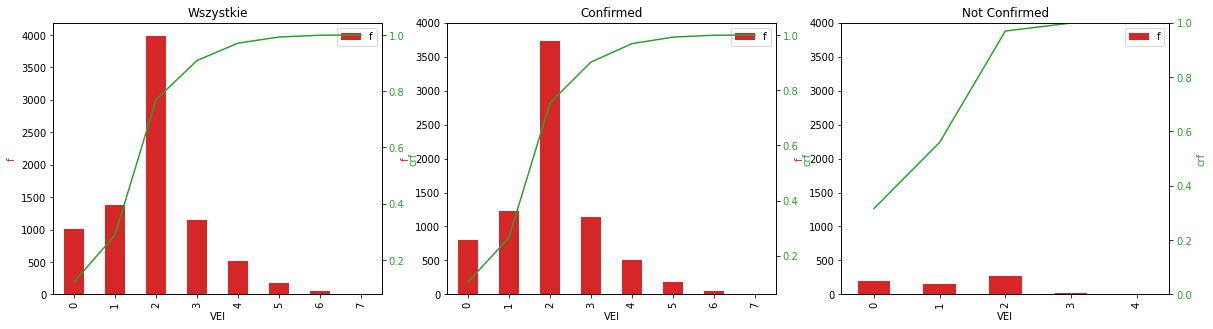

<Figure size 432x288 with 0 Axes>

In [126]:
# YOUR CODE HERE
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5));
plt.figure(facecolor='white')
color = 'tab:red'
color2 = 'tab:green'
ax1.set_xlabel('Vei')
ax1.set_ylabel('f', color = color)
vei_data_1.plot.bar(y="f",color=color,ax=ax1)
ax22 = ax1.twinx()
ax22.set_ylabel('crf', color = color2)
ax22.plot(vei_data_1["crf"],color = color2)
ax22.tick_params(axis ='y', labelcolor = color2)
ax22.set_title('Wszystkie');


ax2.set_xlabel('Vei')
ax2.set_ylabel('f', color = color)
vei_data_2.plot.bar(y="f",color=color,ax=ax2,ylim=[0,4000])
ax33 = ax2.twinx()
ax33.set_ylabel('crf', color = color2)
ax33.plot(vei_data_2["crf"],color = color2)
ax33.tick_params(axis ='y', labelcolor = color2)
ax33.set_title('Confirmed');



ax3.set_xlabel('Vei')
ax3.set_ylabel('f', color = color)
ax44 = ax3.twinx()
vei_data_3.plot.bar(y="f",color=color,ax=ax3,ylim=[0,4000])
ax44.set_ylabel('crf', color = color2)
ax44.set_ylim([0,1]);
ax44.plot(vei_data_3["crf"],color = color2)
ax44.tick_params(axis ='y', labelcolor = color2)
ax44.set_title('Not Confirmed');